<img src="img/Numpy.jpeg" alt="drawing" style="width:40%;"/>
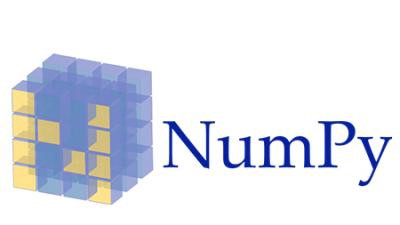

# Introducción a Broadcasting

>"El término broadcasting refiere a como NumPy gestiona arreglos con diferentes dimensiones durante las operaciones aritméticas. Sujeto a ciertas restricciones, el arreglo de menor dimensión se "extiende" respecto del arreglo más grande, de forma que tienen dimensiones compatibles. La principal ventaja de broadcasting es que permite la **vectorización de operaciones matriciales** de forma que las iteraciones ocurren en C en vez de en Python. Por otro lado, realiza las operaciones **sin necesidad de efectuar copias de los datos** lo que lleva generalmente a implementaciones de algoritmos más eficientes." [NumPy Docs](https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting)

## Cargamos NumPy

In [1]:
import numpy as np
import sys

In [3]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
c = 2.0
print("Sin broadcasting: ", a * b)
print("Con broadcasting: ", a * c)

Sin broadcasting:  [2. 4. 6.]
Con broadcasting:  [2. 4. 6.]


<img src="img/broadcast1.gif" alt="drawing" style="width:40%;"/>
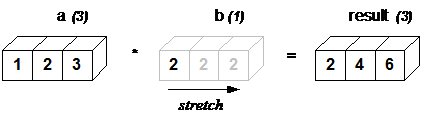

In [4]:
d = np.arange(500000)
e = np.full(500000, 2.0)
f = 2.0

In [5]:
%time d * e

CPU times: user 1.28 ms, sys: 6.01 ms, total: 7.28 ms
Wall time: 3.73 ms


array([0.00000e+00, 2.00000e+00, 4.00000e+00, ..., 9.99994e+05,
       9.99996e+05, 9.99998e+05])

In [6]:
%time d * f

CPU times: user 80 µs, sys: 4.77 ms, total: 4.85 ms
Wall time: 3.26 ms


array([0.00000e+00, 2.00000e+00, 4.00000e+00, ..., 9.99994e+05,
       9.99996e+05, 9.99998e+05])

## Reglas de Broadcasting

> Cuando NumPy opera sobre dos arreglos o matrices, compara sus formas element-wise. Empieza con la dimensión más a la derecha y recorre hasta la primera dimensión. Se considera que dos dimensiones son compatibles cuando:
* Son iguales
* Una de ellas es 1

>**Importante: no hace falta que los dos arreglos tengan la mísma dimensión para realizar broadcasting.**

<img src="img/b12.png" alt="drawing" style="width:60%;"/>
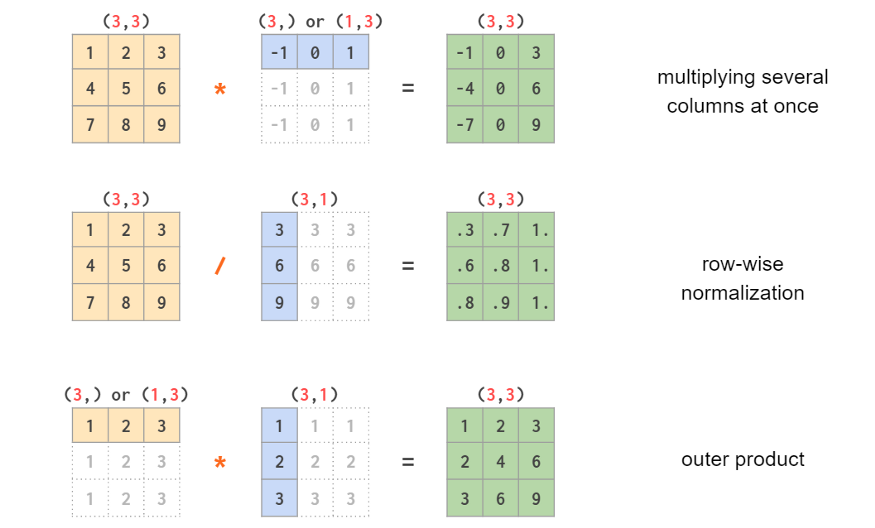

<img src="img/b11.png" alt="drawing" style="width:60%;"/>
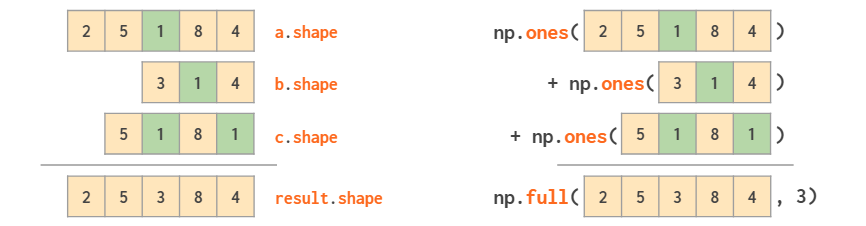

In [7]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(4)
z = np.ones((3,4))

print(x.shape, xx.shape, y.shape, z.shape)

(4,) (4, 1) (4,) (3, 4)


In [8]:
np.array([[1],[2],[3],[4]]).shape

(4, 1)

In [9]:
x + y # (4,) + (4,) 

array([1., 2., 3., 4.])

In [10]:
print(xx, y) #(4, 1) (4,)->(1,4) 

[[0]
 [1]
 [2]
 [3]] [1. 1. 1. 1.]


In [11]:
print(xx + y) 
print((xx + y).shape)

[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
(4, 4)


In [12]:
print(x,'\n', z)

[0 1 2 3] 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [13]:
print(x + z)
print((x + z).shape)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]
(3, 4)


In [26]:
## Podemos verificar si una serie de arreglos pueden ser "broadcasteados" en NumPy. ¡No se suele usar!
np.broadcast(*(xx, y))

In [14]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
print(a.shape)
# np.newaxis agrega una nueva dimensión (1).
print(a[:,np.newaxis].shape)
a[:,np.newaxis] + b # equivalente a a[:,None] + b

(4,)
(4, 1)


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

<img src="img/broadcast4.gif" alt="drawing" style="width:40%;"/>
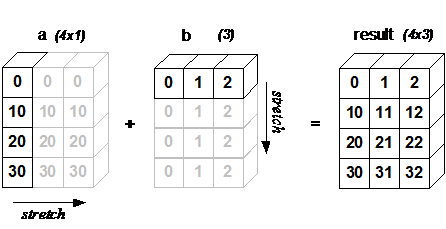

## Bibliografía

* [NumPy Docs](https://numpy.org/doc/stable/user/quickstart.htm)
* [NumPy Array Programming](https://realpython.com/numpy-array-programming/)
* [FreeCodeCamp - Intro to NumPy](https://www.freecodecamp.org/learn/data-analysis-with-python#numpy)
* [Broadcasting in NumPy](https://towardsdatascience.com/broadcasting-in-numpy-58856f926d73)